In [10]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

# WebScraping

In [3]:
def scrape_review(base_url, num_pages):
    reviews = []

    for page in range(1, num_pages + 1):
        # Fetch the page
        url = f"{base_url}/page/{page}/"
        headers = {"User-Agent": "Mozilla/5.0"}
        response = requests.get(url, headers=headers)

        if response.status_code != 200:
            print(f"Failed to fetch page {page}: {response.status_code}")
            continue

        soup = BeautifulSoup(response.content, "html.parser")

        # Locate the review containers using the inspect tool
        review_containers = soup.find_all("div", class_="col-content")

        for container in review_containers:
            try:
                # Extract review details
                title = container.find("h2", class_="text_header").text.strip()
                rating = container.find("span", itemprop="ratingValue").text.strip()
                author = container.find("span", itemprop="name").text.strip()
                date_published = container.find("time", itemprop="datePublished").text.strip()
                review_text = container.find("div", class_="text_content").text.strip()

                # Extract additional info (Type of Traveller, Seat Type, etc.)
                additional_info = {}
                rows = container.find_all("tr") 
                for row in rows:
                    key = row.find("td", class_="review-rating-header").text.strip() if row.find("td", class_="review-rating-header") else None
                    value = row.find("td", class_="review-value").text.strip() if row.find("td", class_="review-value") else None
                    if key and value:
                        additional_info[key] = value

                # Append data to the reviews list
                reviews.append({
                    "title": title,
                    "rating": rating,
                    "author": author,
                    "date_published": date_published,
                    "review_text": review_text,
                    **additional_info  # Include additional info in the final dictionary
                })

            except AttributeError:
                # Skip review containers with missing data
                continue

        # Add a delay to prevent overloading the server
        time.sleep(2)

    # Convert to a DataFrame
    return pd.DataFrame(reviews)

In [4]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"

In [9]:
df = scrape_review(base_url, num_pages = 391)

In [13]:
df.to_csv("skytrax_reviews.csv", index=False)
print("Data saved to skytrax_reviews.csv")

Data saved to skytrax_reviews.csv


In [78]:
review = pd.read_csv("skytrax_reviews.csv")
review.head(5)

,title,rating,author,date_published,review_text,Type Of Traveller,Seat Type,Route,Date Flown,Recommended,Aircraft
0,"""70 days chasing BA’s complaints department""",1,R Layne,15th January 2025,✅ Trip Verified | I booked through BA becaus...,Solo Leisure,Business Class,Cape Town to London,December 2024,yes,Boeing 777
1,"“victims of their new supper service""",7,P Gough,12th December 2024,"✅ Trip Verified | Check in was fine, but no pr...",Solo Leisure,Economy Class,Keflavik to Cape Town via London,October 2024,no,A350
2,"""won't be using her return ticket""",1,Hock Herng Chia,8th November 2024,✅ Trip Verified | A transit visa is required...,Solo Leisure,Economy Class,Vancouver to Gatwick,September 2024,yes,A380-800
3,"""Who can trust BA to travel2",1,J C Albrecht,31st October 2024,Not Verified | The flight scheduled at 1840 l...,Solo Leisure,Economy Class,Johannesburg to New York City via Heathrow,October 2024,no,A320N
4,"""crew were all very friendly""",8,James Tapley,8th October 2024,✅ Trip Verified | I recently flew from New Y...,Couple Leisure,Economy Class,Heathrow to Berlin,July 2024,yes,A321


# Data Cleaning

In [80]:
review.columns

Index(['title', 'rating', 'author', 'date_published', 'review_text',
       'Type Of Traveller', 'Seat Type', 'Route', 'Date Flown', 'Recommended',
       'Aircraft'],
      dtype='object')

In [82]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   title              391 non-null    object
 1   rating             391 non-null    int64 
 2   author             391 non-null    object
 3   date_published     391 non-null    object
 4   review_text        391 non-null    object
 5   Type Of Traveller  315 non-null    object
 6   Seat Type          391 non-null    object
 7   Route              314 non-null    object
 8   Date Flown         314 non-null    object
 9   Recommended        391 non-null    object
 10  Aircraft           315 non-null    object
dtypes: int64(1), object(10)
memory usage: 33.7+ KB


In [84]:
review.describe()

,rating
count,391.000000
mean,4.815857
std,3.288185
min,1.000000
25%,2.000000
50%,4.000000
75%,8.000000
max,10.000000


In [86]:
#Handle missing values
review.isnull().sum()

title                 0
rating                0
author                0
date_published        0
review_text           0
Type Of Traveller    76
Seat Type             0
Route                77
Date Flown           77
Recommended           0
Aircraft             76
dtype: int64

In [88]:
review['Route'].unique()

array(['Cape Town to London', 'Keflavik to Cape Town via London',
       'Vancouver to Gatwick',
       'Johannesburg to New York City via Heathrow', 'Heathrow to Berlin',
       'San Diego to Athens', 'Vancouver to London', 'Sydney to London',
       'Toronto to London', 'London to Manchester',
       'London Heathrow to Singapore', 'London to Valencia',
       'Doha to London Heathrow',
       'Montreal to Venice via London Heathrow',
       'Singapore to Auckland via Sydney',
       'Austin, TX to Shannon, Ireland via Austin',
       'Boston to Düsseldorf via London', 'London to New York',
       'Indianapolis to Mumbai via London Heathrow',
       'Gatwick to Las Palmas', 'Brussels to London',
       'Anchorage to Heathrow via Barcelona', 'Geneva to London Heathrow',
       'Atlanta to Glasgow via London',
       'Dallas to Dubrovnik via Heathrow', 'London to Dalaman',
       'Houston to London Heathrow', 'London to Johannesburg',
       'London to Vienna', 'Rhodes to Gatwick', 'Lo

In [90]:
review['Type Of Traveller'].unique()

array(['Solo Leisure', 'Couple Leisure', 'Business', 'Family Leisure',
       nan], dtype=object)

In [92]:
review['Type Of Traveller'].value_counts().idxmax()

'Solo Leisure'

In [94]:
# Fill the missing value
review.fillna({
    'Route' : 'Unknown',
    'Date Flown' : 'Unknown',
    'Aircraft' : 'Unknown',
    'Type Of Traveller' : 'Solo Leisure'
}, inplace=True)

In [96]:
review.isnull().sum()

title                0
rating               0
author               0
date_published       0
review_text          0
Type Of Traveller    0
Seat Type            0
Route                0
Date Flown           0
Recommended          0
Aircraft             0
dtype: int64

In [98]:
#copying to another dataframe in case something goes wrong
df_review = review

In [104]:
def remove_ordinal_suffix(date_str):
    import re
    # Remove 'st', 'nd', 'rd', 'th' after a number
    return re.sub(r'(\d+)(st|nd|rd|th)', r'\1', date_str)

In [106]:
#Covert to datetime
df_review['date_published'] = df_review['date_published'].apply(remove_ordinal_suffix)
df_review['date_published'] = pd.to_datetime(df_review['date_published'], format="%d %B %Y", errors='coerce')
df_review['Date Flown'] = pd.to_datetime(df_review['Date Flown'],format="%B %Y",errors='coerce')

In [114]:
#Remove uncessary text and strip white space
df_review['review_text'] = df_review['review_text'].str.replace(r"✅ Trip Verified \|", "", regex=True)
df_review['review_text'] = df_review['review_text'].str.replace(r"Not Verified \|", "", regex=True).str.strip()

In [156]:
df_review.head()

,title,rating,author,date_published,review_text,Type Of Traveller,Seat Type,Route,Date Flown,Recommended,Aircraft
0,"""70 days chasing BA’s complaints department""",1,R Layne,2025-01-15,i booked through ba because loganair don’t hav...,Solo Leisure,Business Class,Cape Town to London,2024-12-01,yes,Boeing 777
1,"“victims of their new supper service""",7,P Gough,2024-12-12,"check in was fine, but no priority/fast track ...",Solo Leisure,Economy Class,Keflavik to Cape Town via London,2024-10-01,no,A350
2,"""won't be using her return ticket""",1,Hock Herng Chia,2024-11-08,a transit visa is required for my partner to t...,Solo Leisure,Economy Class,Vancouver to Gatwick,2024-09-01,yes,A380-800
3,"""Who can trust BA to travel2",1,J C Albrecht,2024-10-31,not verified | the flight scheduled at 1840 l...,Solo Leisure,Economy Class,Johannesburg to New York City via Heathrow,2024-10-01,no,A320N
4,"""crew were all very friendly""",8,James Tapley,2024-10-08,i recently flew from new york back to london w...,Couple Leisure,Economy Class,Heathrow to Berlin,2024-07-01,yes,A321


In [158]:
df_review.duplicated().sum()

0

In [162]:
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Sentiment Analysis

In [170]:
# Preprocess text by converting to lowercase and filtering out words with length <= 3
def preprocess_text(text):
    return " ".join([word.lower() for word in text.split() if len(word) > 3])

In [166]:
df_review['review'] = df_review['review_text'].apply(preprocess_text)

In [175]:
# Calculte sentiment polarity
def score(text):
    return TextBlob(text).sentiment.polarity

In [177]:
# Add sentiment score and categories
df_review['sentiment_score'] = df_review['review'].apply(score)
df_review['sentiment_category'] = pd.cut(df_review['sentiment_score'], bins = [-1, -0.01, 0.01, 1], labels = ['Negative', 'Neutral','Positive'])

In [179]:
print(df_review['sentiment_category'].value_counts(normalize=True) * 100)

sentiment_category
Positive    65.984655
Negative    30.434783
Neutral      3.580563
Name: proportion, dtype: float64


# Topic Modelling

In [182]:
#vectorize the text data
vectorizer = CountVectorizer(stop_words = 'english', max_features = 5000)
text_matrix = vectorizer.fit_transform(df_review['review'])

In [186]:
# Apply LDA model for topic modelling
lda_model =  LatentDirichletAllocation(n_components = 5, random_state = 42)
lda_model.fit(text_matrix)

LatentDirichletAllocation(n_components=5, random_state=42)

In [188]:
# Get topic keywords
for idx, topic in enumerate(lda_model.components_):
    print(f"topic {idx + 1}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])

topic 1:
['heathrow', 'later', 'told', 'service', 'days', 'staff', 'airways', 'british', 'luggage', 'flight']
topic 2:
['london', 'time', 'business', 'food', 'crew', 'service', 'class', 'seats', 'seat', 'flight']
topic 3:
['heathrow', 'hours', 'cancelled', 'customer', 'airline', 'british', 'london', 'airways', 'service', 'flight']
topic 4:
['comfortable', 'world', 'time', 'passengers', 'good', 'club', 'cabin', 'seats', 'seat', 'flight']
topic 5:
['london', 'seats', 'cabin', 'seat', 'time', 'crew', 'service', 'good', 'food', 'flight']


# Wordcolud

In [191]:
positive_reviews = " ".join(df_review.loc[df_review['sentiment_category'] == 'Positive', 'review'])
negative_reviews = " ".join(df_review.loc[df_review['sentiment_category'] == 'Negative', 'review'])

In [193]:
pos_WC = WordCloud(width = 800, height =400, background_color = 'white').generate(positive_reviews)

In [199]:
neg_WC = WordCloud(width = 800, height= 400, background_color = 'white').generate(negative_reviews)

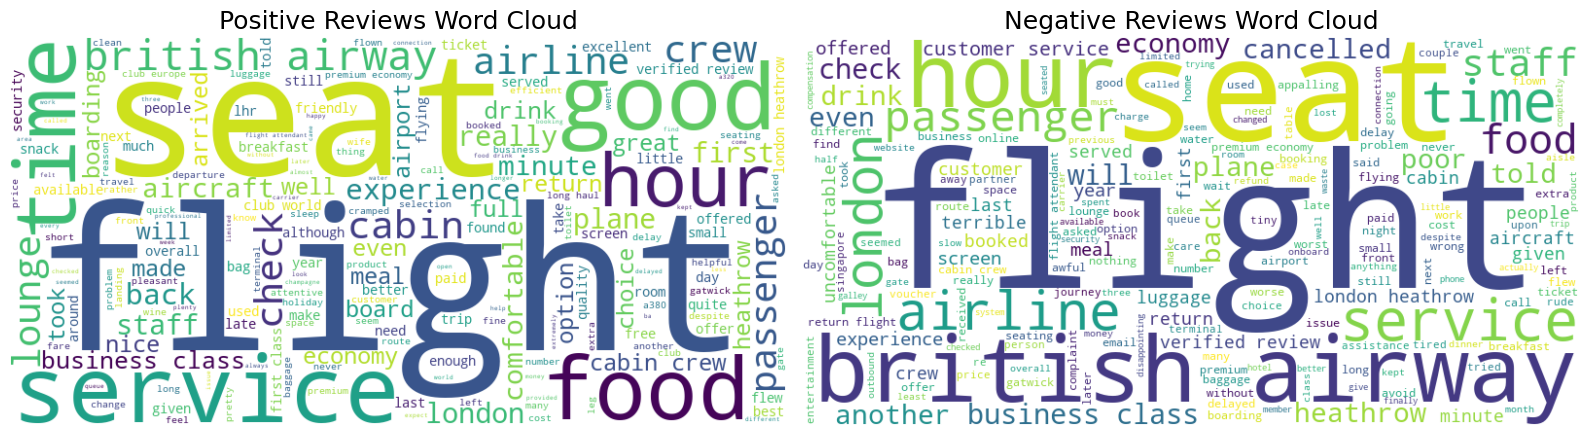

In [205]:
# Plot the wordclouds

fig, axes = plt.subplots( 1,2 , figsize = (16,8))
axes[0].imshow(pos_WC, interpolation='bilinear')
axes[0].set_title('Positive Reviews Word Cloud', fontsize=18)
axes[0].axis('off')

axes[1].imshow(neg_WC, interpolation='bilinear')
axes[1].set_title('Negative Reviews Word Cloud', fontsize=18)
axes[1].axis('off')

plt.tight_layout()
plt.show()